# Round 1

In [2]:
import pandas as pd

In [3]:
churnData=pd.read_csv("DATA_Customer-Churn.txt")

In [4]:
churnData.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.4,No
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,Yes,Yes,No,No,No,No,One year,56.15,3487.95,No


In [5]:
# Checking datatypes.
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Converting "TotalCharges" column to numeric. errors='coerce' fills values that we are unable to convert to numeric with NaNs.
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [7]:
# Checking for null values in the text and replacing them.
churnData.isna().sum()
# Returning the rows that has NaN in TotalCharges column.
churnData[churnData.isna().any(axis=1)]
# Filling them with 0 because their tenure is also 0.
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(0)
# Checking again if any NaN values left in the dataframe.
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
df = churnData[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges","Churn"]]
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

C:\Users\berka\AppData\Local\Temp\ipykernel_16220\897920519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})


In [9]:
# Split the data into a training set and a test set.
from sklearn.model_selection import train_test_split

X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
# Scale the features either by using MinMaxScaler or a standard scaler.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# The fit_transform() method fits the scaler to the training set and then applies it to transform the training set, 
# while the transform() method applies the same scaling to the test set using the parameters learned from the training set. 
# This ensures that the test set is scaled using the same scaling as the training set.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Round 2

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.
model = KNeighborsClassifier(n_neighbors=3, weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred_test = model.predict(X_test) # predict test
y_pred_train = model.predict(X_train) # predict train (for sanity checks)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [13]:
error_metrics_df1, y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test)
error_metrics_df1

,Error_metric,Train,Test
0,Accuracy,0.86,0.77
1,Precision,0.78,0.57
2,Recall,0.67,0.50


In [14]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=3)

model2.fit(X_train, y_train) # we train the model

y_pred_train_dt = model2.predict(X_train) # we predict using X_train
y_pred_test_dt = model2.predict(X_test) # we predict using X_test

error_metrics_df2,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train_dt, y_test, y_pred_test_dt)
error_metrics_df2

,Error_metric,Train,Test
0,Accuracy,0.78,0.79
1,Precision,0.65,0.66
2,Recall,0.40,0.43


In [15]:
print(error_metrics_df1)
print(error_metrics_df2)

  Error_metric  Train  Test
0     Accuracy   0.86  0.77
1    Precision   0.78  0.57
2       Recall   0.67  0.50
  Error_metric  Train  Test
0     Accuracy   0.78  0.79
1    Precision   0.65  0.66
2       Recall   0.40  0.43


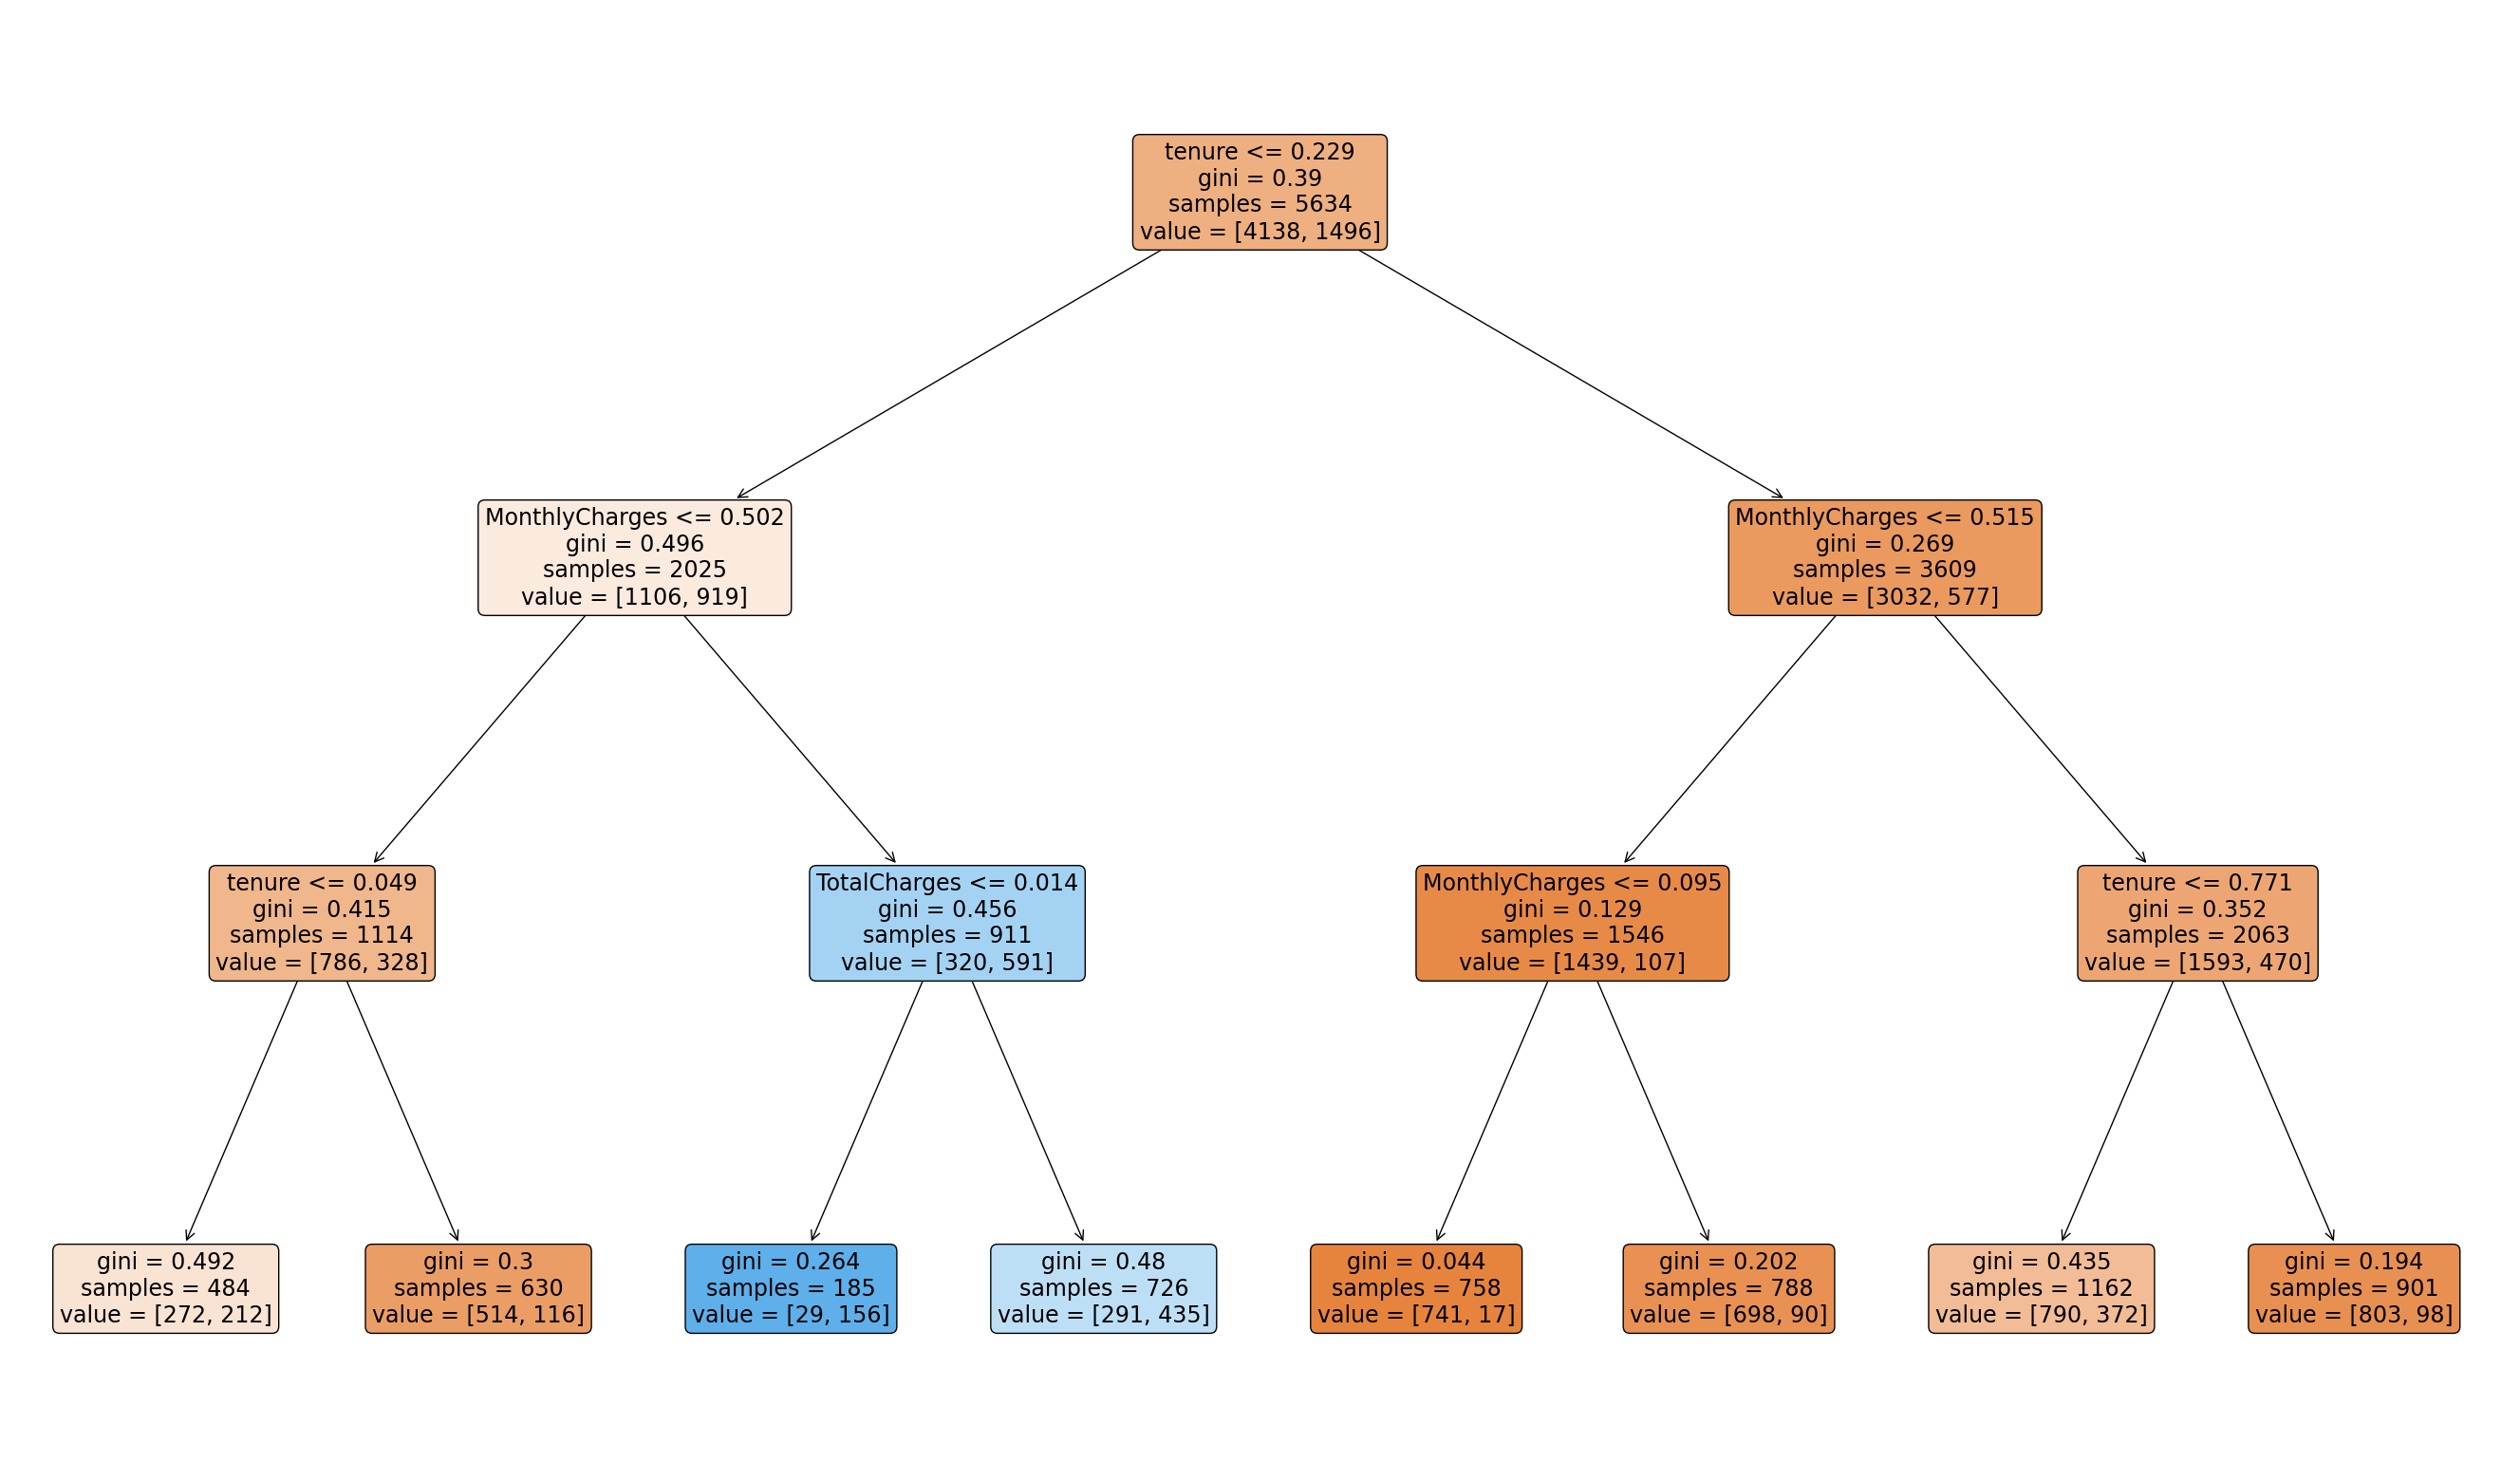

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model2 ,filled = True, rounded=True, feature_names=X.columns)
plt.show()

# Round 3

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [18]:
scores=cross_val_score(model, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.76220053 0.76131322 0.74267968 0.77817214 0.73889876]
Score stats: 0.76 accuracy with a standard deviation of 0.01


In [19]:
scores=cross_val_score(model2, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.78615794 0.78793256 0.76397516 0.78083407 0.77886323]
Score stats: 0.78 accuracy with a standard deviation of 0.01


In [20]:
# Models comparision

import numpy as np

model_pipeline = [model, model2]
model_names = ['KNeighborsClassifier', 'DecisionTreeClassifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    std_score=np.std(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    print(std_score)
    i = i+1
print(scores)

pd.DataFrame([scores], index=["score"])

0.014325033372204646
0.008469102920983162
{'KNeighborsClassifier': 0.7566528657953258, 'DecisionTreeClassifier': 0.7795525932977252}


,KNeighborsClassifier,DecisionTreeClassifier
score,0.76,0.78


# Round 4

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc_ops = {"max_depth":6, # max depth of trees
           "min_samples_leaf":20,
           "max_features":None, # the forest will choose of its own when it is None
           "n_estimators":100, # number of trees
           "bootstrap":True, # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
           "oob_score":True, # out of bag score (Only available if bootstrap=True.)
           "random_state":42}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_train)
print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_train)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

train prediction accuracy score: 0.81
test prediction accuracy score: 0.81


# tune the hyper parameters with Gridsearch and check the results. retrain the final mode with the best parameters found.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False]
    }
clf = RandomForestClassifier(random_state=42)

In [24]:
grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True, n_jobs=-1) 
# cross validation
# njobs technical for parellalization, don't worry

In [25]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [26]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [28]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=42, **best_params)
cross_val_scores = cross_val_score(clf, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))


0.770760455314101


# Managing imbalance in the dataset

In [29]:
# Checking for the imbalance.
print(df["Churn"].value_counts())

NEG_CLASS_CNT = 5174 # number of negative labels
# 1869 positive class counts.

print("The majority class (negative cases) represents {:.2f}% of the data".format(NEG_CLASS_CNT/len(df['Churn'])*100))

0    5174
1    1869
Name: Churn, dtype: int64
The majority class (negative cases) represents 73.46% of the data


# Downsampling

In [31]:
# Downsampling
category_0 = df[df["Churn"] ==0] # negative cases (majority)
category_1 = df[df["Churn"] ==1] # positive cases (minority)

In [32]:
print(category_0.shape)
print(category_1.shape)

(5174, 5)
(1869, 5)


In [36]:
length_of_category_1 = len(category_1)

In [37]:
# downsample the majority class to the size of the positive class using pandas sample method
category_0_down = category_0.sample(length_of_category_1)
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [38]:
# reassemble the data
df_downsampled = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
df_downsampled = df_downsampled.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
df_downsampled['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [50]:
X = df_downsampled.drop(['Churn'], axis=1)
y = df_downsampled['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
scaler = MinMaxScaler()

# The fit_transform() method fits the scaler to the training set and then applies it to transform the training set, 
# while the transform() method applies the same scaling to the test set using the parameters learned from the training set. 
# This ensures that the test set is scaled using the same scaling as the training set.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.
model = KNeighborsClassifier(n_neighbors=3, weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred_test = model.predict(X_test) # predict test
y_pred_train = model.predict(X_train) # predict train (for sanity checks)

In [61]:
error_metrics_df3, y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test)
error_metrics_df3
# It is the exactly same as before ? Downsampling results

ValueError: Found input variables with inconsistent numbers of samples: [8278, 2990]

# Upsampling

In [13]:
category_0 = df[df["Churn"] ==0] # negative cases (majority)
category_1 = df[df["Churn"] ==1] # positive cases (minority)
df["Churn"].shape

(7043,)

In [55]:
print(category_0.shape)
print(category_1.shape)

(5174, 5)
(1869, 5)


In [14]:
c0_len = len(category_0)
c1_len = len(category_1)
c0_len, c1_len

(5174, 1869)

In [57]:
# upsample the positive class now
# - pump it up to the length of the negative class by allowing for row repetition
category_1_up = category_1.sample(c0_len, replace=True) # replace=True allows sampling of the same row more than once.
print(category_1_up.shape) # see that it's the same size a category_0

(5174, 5)


In [58]:
category_1_up

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
97,5,0,21.05,113.85,1
5622,23,0,104.05,2470.10,1
808,40,0,101.30,4113.10,1
6991,8,0,95.65,778.10,1
5194,22,0,89.40,2001.50,1
...,...,...,...,...,...
4517,11,1,99.55,1131.20,1
5385,53,0,85.45,4517.25,1
318,24,1,93.15,2231.05,1
5456,13,0,31.05,347.25,1


In [59]:
df_up = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
df_up = df_up.sample(frac=1)
df_up['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [60]:
X = df_up.drop(['Churn'], axis=1)
y = df_up['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [62]:
scaler = MinMaxScaler()

# The fit_transform() method fits the scaler to the training set and then applies it to transform the training set, 
# while the transform() method applies the same scaling to the test set using the parameters learned from the training set. 
# This ensures that the test set is scaled using the same scaling as the training set.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.
model = KNeighborsClassifier(n_neighbors=3, weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred_test = model.predict(X_test) # predict test
y_pred_train = model.predict(X_train) # predict train (for sanity checks)

In [66]:
error_metrics_df4, y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test)
error_metrics_df4

,Error_metric,Train,Test
0,Accuracy,0.90,0.81
1,Precision,0.85,0.75
2,Recall,0.96,0.90


## Method 2: Upsampling using SMOTE

In [67]:
# upsampling with not duplicates but creating new artificial values. (from the article) takes the middle point of the neigbors and creates a synthetic one.
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [70]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [73]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [74]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## Downsampling using Tomeklinks